In [38]:
from src.utils import *
import pandas as pd
import numpy as np

%matplotlib widget
plt.style.use('ggplot')
plt.close("all")
import matplotlib.dates as mdates


results = pd.read_parquet("data/results/mpc_results_2023-06-27-000000_2023-08-03-23-45-00.parquet")
baseline = pd.read_parquet("data/sym_data/sym_df_5s_res_P-controller_600rpm_v2.parquet")
baseline = baseline["2023-06-27 00:00:00":]
FEATURES = results.columns


display(plot_features_and_target(results, FEATURES))
display(plot_features_and_target(baseline, FEATURES[:-1]))



font = {'family' : 'monospace',
        # 'weight' : 'bold',
        'size'   : 34
}
axes = {
        'edgecolor' : '#000',
        }

lines = {
    'linewidth' : 2,
    }

plt.rc('axes', **axes)
plt.rc('font', **font)
plt.rc('lines', **lines)

/home/seb/miniconda3/envs/mpc_env/lib/python3.11/site-packages/plotly_resampler/figure_resampler/utils.py:177: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



FigureWidgetResampler({
    'data': [{'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~55m</i>'),
              'showlegend': True,
              'type': 'scattergl',
              'uid': 'bafbf739-7cd5-45cd-b3b3-4c72c367d6e7',
              'x': array([datetime.datetime(2023, 6, 27, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 27, 0, 27, 25, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 27, 1, 22, 5, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 8, 3, 22, 24, 35, tzinfo=<UTC>),
                          datetime.datetime(2023, 8, 3, 22, 54, 10, tzinfo=<UTC>),
                          datetime.datetime(2023, 8, 3, 23, 46, 40, tzinfo=<UTC>)], dtype=object),
              'y': array([ 0.00000000e+00,  3.68411389e+02,  4.66665476e+02, ..., -9.39091997e-07,
                          -9.36301376e-07, -9.48636314e-07])},
             {'name': ('<b style="color:sandybrown">[R' ... 'style="color:#f

FigureWidgetResampler({
    'data': [{'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~55m</i>'),
              'showlegend': True,
              'type': 'scattergl',
              'uid': 'cfac6196-0cc5-464a-b624-fd76cd64ed45',
              'x': array([datetime.datetime(2023, 6, 27, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 27, 0, 0, 5, tzinfo=<UTC>),
                          datetime.datetime(2023, 6, 27, 0, 54, 50, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 8, 3, 22, 46, 45, tzinfo=<UTC>),
                          datetime.datetime(2023, 8, 3, 23, 25, 55, tzinfo=<UTC>),
                          datetime.datetime(2023, 8, 3, 23, 59, tzinfo=<UTC>)], dtype=object),
              'y': array([  0.        ,   0.        ,   0.        , ..., 830.34026513,
                            0.        ,   0.        ])},
             {'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~55m</i>'),
    

In [39]:
print(len(baseline[["pump1_power_est","pump3_power_est","pump4_power_est"]][:len(results)].values))
print(len(results))
np.sum(results[["pump1_power_est","pump3_power_est","pump4_power_est"]].values)/np.sum(baseline[["pump1_power_est","pump3_power_est","pump4_power_est"]][:len(results)].values)


655164
655164


0.8325605737710928

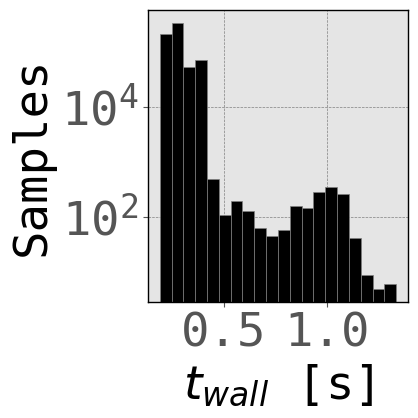

In [40]:
histogram(results["t_wall"][2:].values,20)

In [41]:
pltres = results["2023-08-02 00:00:00":"2023-08-03 00:00:00"].resample("5min").mean()
pltbas = baseline["2023-08-02 00:00:00":"2023-08-03 00:00:00"].resample("5min").mean()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


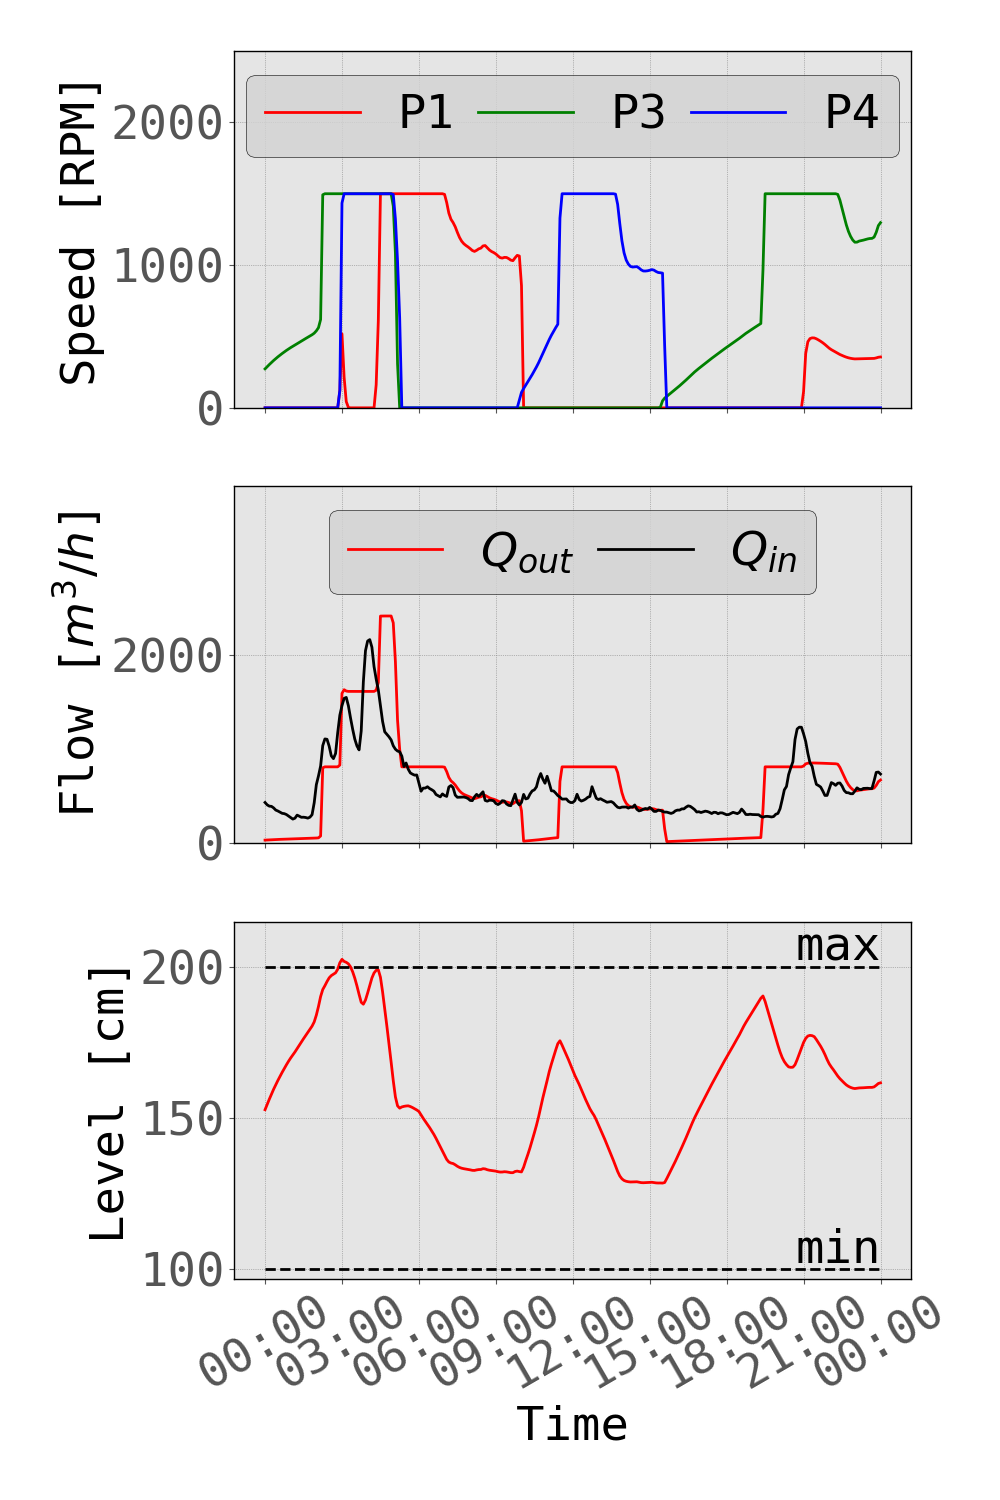

In [42]:
time = pltres.index

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True, sharey=False)

# Plot 1 - Speed [RPM]
axs[0].plot(time,pltres[["pump1_speed"]], "r", label=r'P1')
axs[0].plot(time,pltres[["pump3_speed"]], "g", label=r'P3')
axs[0].plot(time,pltres[["pump4_speed"]], "b", label=r'P4')

axs[0].set_ylim([0, 2500])
axs[0].set_ylabel('Speed [RPM]')
axs[0].grid(linestyle=':', linewidth='0.5', color='gray')
axs[0].legend(loc='upper center', columnspacing=0.5, ncol=3, frameon=True, facecolor='lightgray', edgecolor='black')

plt.xticks(rotation=30)

# Plot 4 - Volumetric Flow Rate
axs[1].plot(time,pltres[["outflow"]],"r", label=r'$Q_{out}$')
axs[1].plot(time,pltres[["inflow"]],"k", label=r'$Q_{in}$')
axs[1].set_ylabel(r"Flow [$m^3/h$]")

axs[1].grid(linestyle=':', linewidth='0.5', color='gray')
axs[1].set_ylim([0, 3800])
axs[1].legend(loc='upper center', columnspacing=0.5, ncol=3, frameon=True, facecolor='lightgray', edgecolor='black')

axs[2].plot(time,pltres[["level"]], "r", label=r'P4')
axs[2].plot([time[0],time[-1]],[200,200], "k--", label=r'P4')
axs[2].plot([time[0],time[-1]],[100,100], "k--", label=r'P4')
axs[2].text(time[-1],202,"max",ha="right")
axs[2].text(time[-1],102,"min",ha="right")


axs[2].set_ylim([97, 215])
axs[2].set_ylabel('Level [cm]')
axs[2].grid(linestyle=':', linewidth='0.5', color='gray')
axs[2].set_xlabel("Time")

myFmt = mdates.DateFormatter('%H:%M')
axs[1].xaxis.set_major_formatter(myFmt)

plt.tight_layout()
plt.savefig('img/pump_selection.eps', format='eps', transparent=True)


plt.show()

In [43]:
pltres = results[:"2023-08-03 22:00:00"].resample("1h").max()
pltbas = baseline[:"2023-08-03 22:00:00"].resample("1h").max()

pltres_mean = results[:"2023-08-03 22:00:00"].resample("24h").mean()
pltbas_mean = baseline[:"2023-08-03 22:00:00"].resample("24h").mean()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


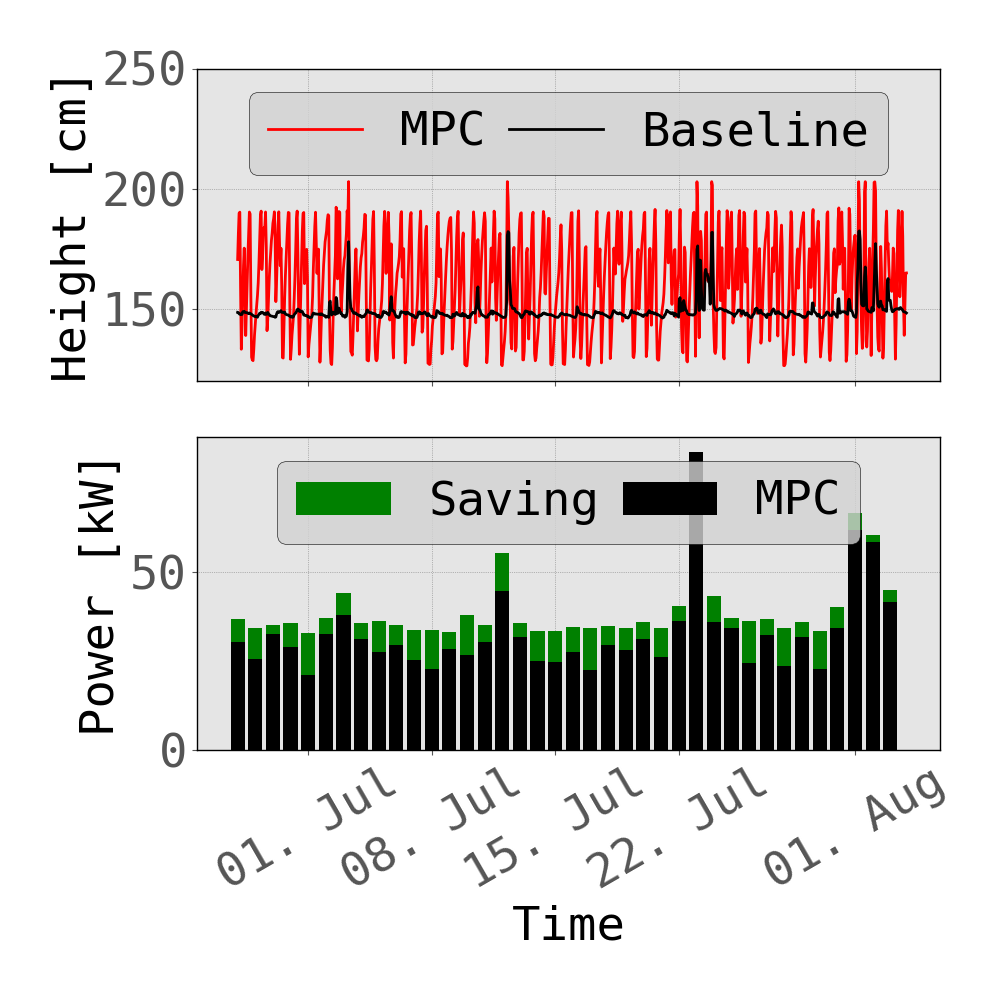

In [44]:

time = pltres.index

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)

# Plot 1 - Speed [RPM]
axs[0].plot(time,pltres[["level"]], "r", label= r'MPC')
axs[0].plot(time,pltbas[["level"]], "k", label= r'Baseline')

axs[0].set_ylim([120, 250])
axs[0].set_ylabel('Height [cm]')
axs[0].grid(linestyle=':', linewidth='0.5', color='gray')
axs[0].legend(loc='upper center', columnspacing=0.5, ncol=3, frameon=True, facecolor='lightgray', edgecolor='black')

plt.xticks(rotation=30)



axs[1].bar(pltres_mean.index,pltbas_mean[["pump1_power_est","pump3_power_est","pump4_power_est"]].sum(1),color="g", label='Saving')
axs[1].bar(pltres_mean.index,pltres_mean[["pump1_power_est","pump3_power_est","pump4_power_est"]].sum(1),color="k", label='MPC')
axs[1].set_ylabel("Power [kW]")
axs[1].set_xlabel("Time")
axs[1].grid(linestyle=':', linewidth='0.5', color='gray')
axs[1].legend(loc='upper center', columnspacing=0.5, ncol=3, frameon=True, facecolor='lightgray', edgecolor='black')

myFmt = mdates.DateFormatter('%d. %b')
axs[1].xaxis.set_major_formatter(myFmt)
plt.tight_layout()

plt.savefig('img/long_time.eps', format='eps' , transparent=True)

plt.show()